In [1]:

#imports

#data handeling libraries
import numpy as np
import pandas as pd
import scipy as sp

#important for datestamp
import datetime

#statistics
import math
import statistics

#plotting
import matplotlib.pyplot as plt

#scikitlean stuff
from sklearn.neural_network import MLPRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

#os (for looking at directories to read all of the files contained)
import os

In [2]:
#loading the poes data

#function to load a poes data file
def getPoesDF(fileName):
    POESFile = open(fileName, "rt") #open file in read text mode

    #count number of lines in POES file
    lineCount = 0
    POESContent = POESFile.read()
    POESContentList = POESContent.split("\n")

    for line in POESContentList: #get the number of lines in the file
        lineCount +=1

    print("file has: " + str(lineCount) + " lines") #pring for debugging purposes

    #close and reopen the file.  This resets the cursor back to the start because the counting process puts it at the end
    POESFile.close()
    POESFile = open(fileName, "rt") #open file in read text mode

    #initialize two lists to append to in the following for loop
    sensor4List = []
    sensor5List = []

    #myList = []

    #for loop to read all of the data contents
    for i in range(0, lineCount -1): #read to end of file like this for now
        line = POESFile.readline().split() #split up each line of the file
        #print(line)

        #determine whether to write to list 4 or list 5
        #based on split line, select a list
        if line[3] == '4':
            currentList = sensor4List
            #sensor4List.append(line) 
        elif line[3] == '5':
        #sensor4List.append(float(line[4]))
        #sensor5List.append(line)
            currentList = sensor5List
        else: #if the sensor number is something different then ignore it
            continue

        #currentList.append(line)

        
        timeValue = datetime.datetime(int(line[2]), int(line[1]), int(line[0])) #creat a datetime value based on the datetime fields from the peos data
        lineForList = list() #create a list variable
        lineForList.append(timeValue) #append the time to it
        for i in range(3,8): #add the data values
            lineForList.append(float(line[i]))
        currentList.append(lineForList) #append to the previously selected list (sensor 4 or sensor 5)



    #print(myList)
    
    #manual poes column names
    poesColumnNames = ["day", "month", "year", "sensor number", "total", "inner", "slot", "outer"]
    datetimeColumnNames = ["datetime"].append(poesColumnNames[3:7])

    #manual poes column names used for our data frames
    realPoesColumnNames = ["date", "sensor number", "total", "inner", "slot", "outer"]

    #create poes data frames one for each sensor
    sensor5 = pd.DataFrame(sensor5List, columns= realPoesColumnNames)
    sensor4 = pd.DataFrame(sensor4List, columns= realPoesColumnNames)
    return sensor5

#print(sensor5.shape)
#print(sensor5)

#make np arrays of total belt index
#sensor4 = np.array(sensor4List)
#sensor5 = np.array(sensor5List)

#plot just for test purposes
#plt.plot(sensor4, label = "sensor 6")
#plt.plot(sensor5, label = "sensor 7")
#plt.legend()
#plt.show()

#print(len(sensor4))

#POESTotal = sensor4 #np.add(sensor4, sensor5)




#import poes data to numpy array
#fileName = "cleaned_poes_data.txt"


#the directory name for the poes data
directoryName = "metop"

#get the list of al  the flies
listOfFiles = os.listdir(directoryName)
print(listOfFiles)
#sort the years

listOfDataFrames = []

#
for fileName in listOfFiles:
    #get current file
    print(fileName)
    thisFileDf = getPoesDF(directoryName + "\\" + fileName) #get the contents
    listOfDataFrames.append(thisFileDf)


poesDF = pd.concat(listOfDataFrames).reset_index(drop= True) #concat and reset index so its just one after the other
print(poesDF)




['bi_M02_2013.txt', 'bi_M02_2014.txt', 'bi_M02_2015.txt', 'bi_M02_2016.txt', 'bi_M02_2017.txt', 'bi_M02_2018.txt', 'bi_M02_2019.txt', 'bi_M02_2020.txt', 'bi_M02_2021.txt']
bi_M02_2013.txt
file has: 8008 lines
bi_M02_2014.txt
file has: 7502 lines
bi_M02_2015.txt
file has: 7766 lines
bi_M02_2016.txt
file has: 7854 lines
bi_M02_2017.txt
file has: 7876 lines
bi_M02_2018.txt
file has: 7854 lines
bi_M02_2019.txt
file has: 7502 lines
bi_M02_2020.txt
file has: 7326 lines
bi_M02_2021.txt
file has: 3916 lines
           date  sensor number   total   inner    slot   outer
0    2013-01-01            5.0 -1.0000  1.2382  1.2647  0.0666
1    2013-01-02            5.0 -1.0000  0.9878  1.1514  0.0544
2    2013-01-03            5.0 -1.0000  0.9886  1.3075  0.0504
3    2013-01-04            5.0 -1.0000  1.1230  1.2280  0.0512
4    2013-01-05            5.0 -1.0000  0.9673  1.0613  0.0466
...         ...            ...     ...     ...     ...     ...
2977 2021-07-07            5.0  0.5924  1.0607  1.0269

In [3]:
#code to get the magnetic indicies data loaded from files downloaded from CDAWeb

#file names and open the file
magFileName = "omniData\OMNI2_H0_MRG1HR_254325.csv"
magDataFile = open(magFileName, "rt")#open file

#get number of lines

#initialize the number of lines to zero
lineCount = 0

magContent = magDataFile.read()
magContentList = magContent.split("\n") #read and then split the file based on the lines

for line in magContentList: #count the number of lines
    lineCount +=1

print("mag file has: " + str(lineCount) + " lines") #print for debug purposes

magDataFile.close() #close the file to reset the cursor back to the start

#read the data
magDataFile = open(magFileName, "rt") #open file in read text mode


#inputMatrixList = []

#initialize lists

#lists which will be loaded with the geomagnetic indicies for each of the days
dstDay = []
auDay = []
alDay = []

#these lists will contain sublists with each entry for the given day (min/max/mean etc.)
dstList = []
auList = []
alList = []

totalList = []

hour = 0
lastHour = 0



for i in range(0, lineCount-1):
    #get and split the line into data and various time components

    line = magDataFile.readline().split(",")
    if(line):
        dateAndTime = line[0].split("T")
        #print(dateAndTime)
        date = dateAndTime[0].split("-")
        time = dateAndTime[1].split(":")
        #print(time)
        hour = int(time[0])
        year = int(date[0])
        month =int(date[1])
        day = int(date[2])
        
        #print(hour)
        #print(str(hour) + ", " + str(lastHour))

        dstDay.append(int(line[1]))
        alDay.append(int(line[2]))
        auDay.append(int(line[3]))

        if hour == 23: #if end of day
            #print("end of day")
            dateValue = datetime.datetime(year, month, day) #make datetime value

            #write to matrix
            #dst
            dstWriteList = [dateValue]
            #dstDay.append(dateValue)

            #statistics quanities for dst
            dstWriteList.append(statistics.mean(dstDay)) #mean
            #dstWriteList.append(statistics.median(dstDay)) #median
           # dstWriteList.append(statistics.mode(dstDay)) #mode
            dstWriteList.append(statistics.stdev(dstDay)) #stdev
            dstWriteList.append(statistics.variance(dstDay)) #variance
            dstWriteList.append(sp.stats.linregress(dstDay, np.linspace(0, 23, 24))[0])
            dstWriteList.append(np.sign( sp.stats.linregress(dstDay, np.linspace(0, 23, 24))[0]))
            dstWriteList.append(min(dstDay))
            dstWriteList.append(max(dstDay))


            dstWriteList = dstWriteList + dstDay #day content


            dstList.append(dstWriteList)

            #al
            alWriteList = [dateValue]
            
            #statistics quanities for al
            alWriteList.append(statistics.mean(dstDay)) #mean
            #alWriteList.append(statistics.median(dstDay)) #median
            #alWriteList.append(statistics.mode(dstDay)) #mode
            alWriteList.append(statistics.stdev(dstDay)) #stdev
            alWriteList.append(statistics.variance(dstDay)) #variance
            alWriteList.append(sp.stats.linregress(alDay, np.linspace(0, 23, 24))[0])
            alWriteList.append(np.sign( sp.stats.linregress(alDay, np.linspace(0, 23, 24))[0]))
            alWriteList.append(min(alDay))
            alWriteList.append(max(alDay))
            
            alWriteList = alWriteList + alDay

            #alDay.append(dateValue)
            alList.append(alWriteList)

            #au
            auWriteList = [dateValue]
            
            #statistics quanities for au
            auWriteList.append(statistics.mean(dstDay)) #mean
           # auWriteList.append(statistics.median(dstDay)) #median
           # auWriteList.append(statistics.mode(dstDay)) #mode
            auWriteList.append(statistics.stdev(dstDay)) #stdev
            auWriteList.append(statistics.variance(dstDay)) #variance
            auWriteList.append(sp.stats.linregress(auDay, np.linspace(0, 23, 24))[0])
            auWriteList.append(np.sign(sp.stats.linregress(auDay, np.linspace(0, 23, 24))[0]))

            auWriteList.append(min(auDay))
            auWriteList.append(max(auDay))

            auWriteList = auWriteList + auDay

            #write to the list that gets converted
            auList.append(auWriteList)


            #reset lists
            dstDay = []
            auDay = []
            alDay = []

            if day >= 30 and month == 12 and year >=2018: #if end of last year then exit
                break

        

        latHour = hour

print("end of loop")

#print(dstList)

magColumnBaseNames = ["date", "mean", "stdev", "variance", "slope", "slope sign", "min", "max"]

for i in range(0, 24):
    magColumnBaseNames.append("hour_" +str(i)) #add hours

dstColumnNames = ["date"]
alColumnNames = ["date"]
auColumnNames = ["date"]

for i in range(1, len(magColumnBaseNames)):
    dstColumnNames.append("dst_" + magColumnBaseNames[i])
    alColumnNames.append("al_" + magColumnBaseNames[i])
    auColumnNames.append("au_" + magColumnBaseNames[i])

fullInputNames = dstColumnNames.copy()
fullInputNames.append(alColumnNames)
fullInputNames.append(auColumnNames)



#totalDF = pd.DataFrame(totalList).reset_index(drop = True)
dstDF = pd.DataFrame(dstList, columns= dstColumnNames).reset_index(drop = True)
alDF = pd.DataFrame(alList, columns= alColumnNames).reset_index(drop = True)
auDF = pd.DataFrame(auList, columns= auColumnNames).reset_index(drop = True)

print(alDF.shape)


mag file has: 44568 lines
end of loop
(1856, 32)


In [4]:
#merge tables
jointDF = dstDF.copy() #copy the original table
jointDF = jointDF.merge(alDF, how='inner', on = "date") #join with the AL data
jointDF = jointDF.merge(auDF, how='inner', on = "date") #join with the AU data
jointDF = jointDF.merge(poesDF, how='inner', on = "date") #join with the poes data

jointDF.to_csv("fullRangeDataDump.csv")

"""
columns = ['date', 'dst_mean', 'dst_stdev', 'dst_variance', 'dst_slope',
       'dst_slope sign', 'dst_min', 'dst_max', 'al_mean', 'al_stdev',
       'al_variance', 'al_slope', 'al_slope sign', 'al_min', 'al_max',
       'au_mean', 'au_stdev', 'au_variance', 'au_slope', 'au_slope sign',
       'au_min', 'au_max', 'sensor number', 'total', 'inner', 'slot', 'outer']

newColumns = ['date', 'dst_mean', 'dst_stdev', 'dst_variance', 'dst_slope',
       'dst_slope sign', 'dst_min', 'al_max', 'al_mean', 'al_stdev',
       'al_variance', 'al_slope', 'al_slope sign', 'al_min', 'dst_max',
       'au_mean', 'au_stdev', 'au_variance', 'au_slope', 'au_slope sign',
       'au_min', 'au_max', 'sensor number', 'total', 'inner', 'slot', 'outer']

jointDF = jointDF.reindex(columns = columns)


"""


dateTimeList = []
for dateTimeItem in jointDF.loc[:, "date"]:
    dateTimeList.append(dateTimeItem.timestamp()) #make a timestamp list

jointDF["datestamp"] = dateTimeList #append to the joint data frame
jointDF["random"] = np.random.rand(len(dateTimeList)) #append a random input for testing
jointDF["constant"] = np.full(len(dateTimeList), 2) #append a constant input for testing

#print(jointDF.columns[1:(len(dstColumnNames[1:])*3 +1)])


print(jointDF) #print for debug purposes

           date   dst_mean  dst_stdev  dst_variance  dst_slope  \
0    2013-01-01   0.958333   2.422345      5.867754   0.040753   
1    2013-01-02   3.750000   4.551636     20.717391  -0.904512   
2    2013-01-03  11.250000   4.109903     16.891304  -0.048906   
3    2013-01-04   9.041667   3.804793     14.476449  -0.539106   
4    2013-01-05   5.916667   2.518051      6.340580   0.205714   
...         ...        ...        ...           ...        ...   
1796 2018-01-26  -6.250000   5.479210     30.021739   0.692252   
1797 2018-01-27  -7.625000   3.548576     12.592391  -0.063876   
1798 2018-01-28  -1.791667   2.948532      8.693841   0.922692   
1799 2018-01-29   1.291667   2.595635      6.737319   1.248723   
1800 2018-01-30   2.125000   5.160995     26.635870   0.830035   

      dst_slope sign  dst_min  dst_max  dst_hour_0  dst_hour_1  ...  \
0                1.0       -4        5           4           4  ...   
1               -1.0       -3       11           7           9  .

In [5]:
#split so have test segment of data

#note this might be improved by changing the test data split in the "trainingData" set
#right now we have random training and test data in the the "trainingData" and sequential test data in "newTestData"

#this does have the benefit of having both random and sequential data to test on but it also means we have overall less training data which is scarce to come by

dataPointToSplitAt = 1400 #input for what day to split on

trainingData = jointDF.copy()[0:dataPointToSplitAt][:] #this is like our original data set.  this will be randomly split using train/test/split into training and test data

newTestData = jointDF.copy()[dataPointToSplitAt:][:] #our sequential test data

print(newTestData)


           date   dst_mean  dst_stdev  dst_variance  dst_slope  \
1400 2016-12-17   4.291667   2.911434      8.476449  -0.571917   
1401 2016-12-18 -10.208333   4.413213     19.476449   0.351595   
1402 2016-12-19  -9.833333   5.155551     26.579710   0.181570   
1403 2016-12-20  -5.833333   3.772517     14.231884   0.705703   
1404 2016-12-21 -15.916667  14.752794    217.644928  -0.366173   
...         ...        ...        ...           ...        ...   
1796 2018-01-26  -6.250000   5.479210     30.021739   0.692252   
1797 2018-01-27  -7.625000   3.548576     12.592391  -0.063876   
1798 2018-01-28  -1.791667   2.948532      8.693841   0.922692   
1799 2018-01-29   1.291667   2.595635      6.737319   1.248723   
1800 2018-01-30   2.125000   5.160995     26.635870   0.830035   

      dst_slope sign  dst_min  dst_max  dst_hour_0  dst_hour_1  ...  \
1400            -1.0       -3        9           6           6  ...   
1401             1.0      -22       -3          -3         -11  .

1801
(1400, 96)


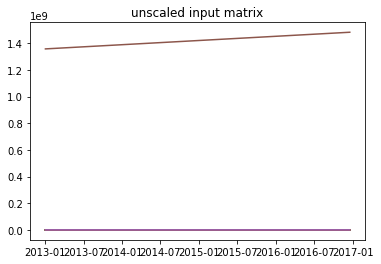

In [6]:
#make input matrix and plot


#keysToStack = dstColumnNames[1:]



#create a list of keys we want to put the dataseries of into the input matrix
keysToStack = [] 
firstPartOfKeys = jointDF.columns[1:(len(dstColumnNames[1:])*3 +1)]


for key in firstPartOfKeys:
    keysToStack.append(str(key))

lastKeys = ["random", "constant", "datestamp"] #the last of the keys we need to input

#append those last keys
for key in lastKeys:
    keysToStack.append(key)


#this is when we just want a subset of the keys, uncomment this for this 
#actual make keys
#keysToStack = ["dst_max", "dst_mean", "al_mean", "au_mean", "datestamp", "random", "constant"]
#keysToStack = ["dst_max", "constant"]


#input matrix that gets divided into training and test data   
inputMatrix = []
#inputMatrix.append(dateTimeList)


#append all the dataseries from the keys into the input matrix
for key in keysToStack:
    inputMatrix.append(trainingData.loc[:, key]) #note we are appending from the training data df

inputMatrix = np.stack(inputMatrix, -1)#reshape the input matrix as rerquired by sklean

#make the training data matrix
testMatrix = []


for key in keysToStack:
    testMatrix.append(newTestData.loc[:, key]) #append to the test matrix note we are appending from the newTestData

testMatrix = np.stack(testMatrix, -1) #reshape the input matrix as rerquired by sklean
    
#inputMatrix.append(list(np.full(len(dateTimeList), 2))) #constant
#inputMatrix.append(list(np.random.rand(len(dateTimeList)))) #random


#print(dateTimeList)
#add datetime to the input matrix

print(len(np.full(len(dateTimeList), 2)))






    
#print(dateTimeList)

#debugging plot
print(inputMatrix.shape)
plt.plot(trainingData.loc[:, "date"], inputMatrix)
plt.title("unscaled input matrix")
plt.show()

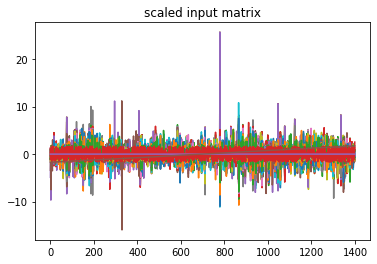

In [7]:
#scale the input matrix
from sklearn.preprocessing import StandardScaler #import scaling stuff
scaledInputMatrix = inputMatrix.copy() #make a copy of the data frame so we don't overwrite

#make a scaler
scaler = StandardScaler()
scaler.fit(scaledInputMatrix) #fit our matrix
scaledInputMatrix = scaler.transform(scaledInputMatrix) #transform


scaledTestMatrix = testMatrix.copy() #make a copy so don't overwrite
scaler.fit(testMatrix) #fit the test matrix
scaledTestMatrix = scaler.transform(scaledTestMatrix) #scale the matrix

#plot 4 debug
#plt.plot(scaledInputMatrix)
plt.plot(scaledInputMatrix)
plt.title("scaled input matrix")
plt.show()


(1400,)


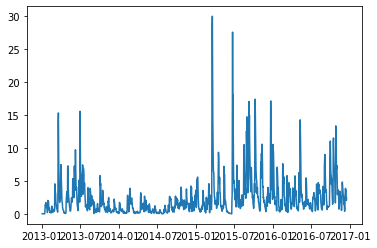

In [8]:
#make output vector and plot
outputVector = np.array(trainingData.loc[:, "outer"]) #select outer band as has strongest correlation

testOutputVector = np.array(newTestData.loc[:, "outer"])
print(outputVector.shape)
plt.plot(trainingData.loc[:, "date"], outputVector)
#plt.ylim(0, 1)
#plt.xlim(28, 42)
#plt.plot(jointDF.loc[:, "inner"])
plt.show()

In [9]:
#make the ML model

#random forest
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression


#make a model for scaled data

#split data

xTrain, xTest, yTrain, yTest = train_test_split(scaledInputMatrix, outputVector, random_state=1) #split the data into 4 categories

#make the model
#scaledPoesRegr = MLPRegressor(random_state=1, hidden_layer_sizes=(100,), max_iter=5000).fit(xTrain, yTrain)

#get output prediciton
#myScaledPrediction = scaledPoesRegr.predict(scaledInputMatrix)

#score the regr
#score = scaledPoesRegr.score(xTest, yTest)
#poesRegr.score(xTrain, yTrain)

forestRegr = RandomForestRegressor(max_depth=100, n_estimators=100, random_state=1, verbose=1)
forestRegr.fit(xTrain, yTrain)

forestPrediction = forestRegr.predict(scaledInputMatrix)

forrestTestDataPrediction = forestRegr.predict(xTest)

score = forestRegr.score(xTest, yTest)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    8.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


In [10]:
#run the model on the sequential test data section
unbiasedPredict = forestRegr.predict(scaledTestMatrix)
#unbiasedScore = forestRegr.score() # this needs more work
unbiasedScore = forestRegr.score(scaledTestMatrix, testOutputVector)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


score is: 0.41409578071800046
cor coef = [[1.         0.54037427]
 [0.54037427 1.        ]]


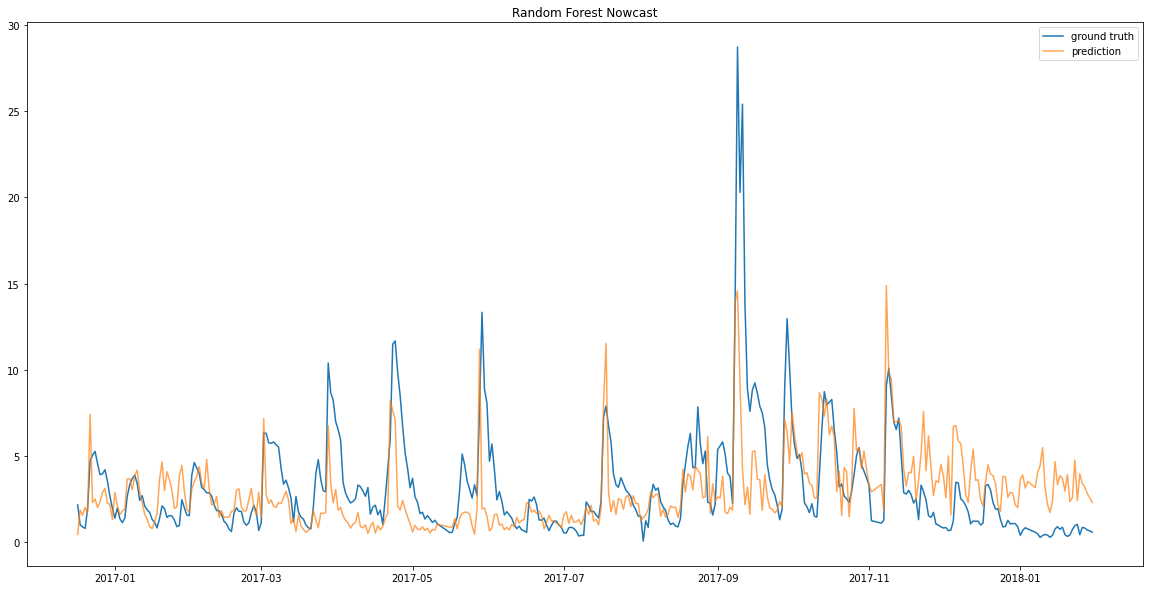

In [11]:
#forest output

print("score is: " + str(score))

print("cor coef = " + str(np.corrcoef(unbiasedPredict, testOutputVector)))

f = plt.figure()
f.set_figwidth(20)
f.set_figheight(10)
plt.plot(newTestData.loc[:, "date"], testOutputVector, label = "ground truth")
plt.plot(newTestData.loc[:, "date"], unbiasedPredict, label = "prediction", alpha = 0.7)
plt.title("Random Forest Nowcast")
plt.legend()
plt.show()
#try explainable keras? model
#compare to hystersis
#-tommorrow is gonna be like today

#nithin clock/vector plot thing (dial plot)

In [12]:
#inputs

import random

groundTruthSeries =testOutputVector
predicedSeries = unbiasedPredict


percentileAmmount = 90

predictPercentile = np.percentile(predicedSeries, percentileAmmount)
groundTruthPercentile = np.percentile(groundTruthSeries, percentileAmmount)

print("predicted series percentile: " + str(predictPercentile))
print("ground truth percentile: " + str(groundTruthPercentile))


#walk through the data series
#check if both above the percentile
#based on yes no answers sort event into true/false and pos/negative
#   also store a counter of all the events

truePositive = 0
falsePositive = 0
trueNegative = 0
falseNegative = 0

positiveEvents = 0
negativeEvents = 0


modelPredicitons = []
randompredictions = []
alwaysFalsePredctions = []
alwyasTruePredictions = []
historyPredictions = []


#threshold -ML model
for i in range (0, len(testOutputVector)):
    predictedIsAbove = bool(predicedSeries[i] > groundTruthPercentile)
    modelPredicitons.append(groundTruthPercentile*int(predictedIsAbove))
    groundTruthIsAbove = bool(groundTruthSeries[i] > groundTruthPercentile)

    if(groundTruthIsAbove):
        positiveEvents +=1
    else:
        negativeEvents +=1

    if(predictedIsAbove and groundTruthIsAbove):
        truePositive += 1
    elif(not predictedIsAbove and groundTruthIsAbove):
        falseNegative +=1
    elif(predictedIsAbove and not groundTruthIsAbove):
        falsePositive+=1
    else:
        trueNegative+=1

print("true positives: " + str(truePositive))
print("false positives: " + str(falsePositive))
print("true negatives: " + str(trueNegative))
print("false negatives: " + str(falseNegative))
print("*************")
print("sensitivity: " + str(truePositive / positiveEvents))
print("specificity: " + str(trueNegative/negativeEvents))

print("miss rate: " + str(falseNegative/positiveEvents))

truePositive = 0
falsePositive = 0
trueNegative = 0
falseNegative = 0

positiveEvents = 0
negativeEvents = 0

#random
print("*****************************************")
print("stats for random model:")

for i in range (0, len(testOutputVector)):
    predictedIsAbove = bool(random.randint(0,1))
    randompredictions.append(groundTruthPercentile*int(predictedIsAbove))
    groundTruthIsAbove = bool(groundTruthSeries[i] > groundTruthPercentile)

    if(groundTruthIsAbove):
        positiveEvents +=1
    else:
        negativeEvents +=1

    if(predictedIsAbove and groundTruthIsAbove):
        truePositive += 1
    elif(not predictedIsAbove and groundTruthIsAbove):
        falseNegative +=1
    elif(predictedIsAbove and not groundTruthIsAbove):
        falsePositive+=1
    else:
        trueNegative+=1


print("true positives: " + str(truePositive))
print("false positives: " + str(falsePositive))
print("true negatives: " + str(trueNegative))
print("false negatives: " + str(falseNegative))
print("*************")
print("sensitivity: " + str(truePositive / positiveEvents))
print("specificity: " + str(trueNegative/negativeEvents))

print("miss rate: " + str(falseNegative/positiveEvents))


truePositive = 0
falsePositive = 0
trueNegative = 0
falseNegative = 0

positiveEvents = 0
negativeEvents = 0


#always select not true
print("*****************************************")
print("stats for never true model:")

for i in range (0, len(testOutputVector)):
    predictedIsAbove = bool(groundTruthPercentile*0)
    alwaysFalsePredctions.append(0)
    groundTruthIsAbove = bool(groundTruthSeries[i] > groundTruthPercentile)

    if(groundTruthIsAbove):
        positiveEvents +=1
    else:
        negativeEvents +=1

    if(predictedIsAbove and groundTruthIsAbove):
        truePositive += 1
    elif(not predictedIsAbove and groundTruthIsAbove):
        falseNegative +=1
    elif(predictedIsAbove and not groundTruthIsAbove):
        falsePositive+=1
    else:
        trueNegative+=1

print("true positives: " + str(truePositive))
print("false positives: " + str(falsePositive))
print("true negatives: " + str(trueNegative))
print("false negatives: " + str(falseNegative))
print("*************")
print("sensitivity: " + str(truePositive / positiveEvents))
print("specificity: " + str(trueNegative/negativeEvents))

print("miss rate: " + str(falseNegative/positiveEvents))


truePositive = 0
falsePositive = 0
trueNegative = 0
falseNegative = 0

positiveEvents = 0
negativeEvents = 0


#always select true
print("*****************************************")
print("stats for always true model:")

for i in range (0, len(testOutputVector)):
    predictedIsAbove = groundTruthPercentile * 1
    alwyasTruePredictions.append(1)
    groundTruthIsAbove = bool(groundTruthSeries[i] > groundTruthPercentile)

    if(groundTruthIsAbove):
        positiveEvents +=1
    else:
        negativeEvents +=1

    if(predictedIsAbove and groundTruthIsAbove):
        truePositive += 1
    elif(not predictedIsAbove and groundTruthIsAbove):
        falseNegative +=1
    elif(predictedIsAbove and not groundTruthIsAbove):
        falsePositive+=1
    else:
        trueNegative+=1


print("true positives: " + str(truePositive))
print("false positives: " + str(falsePositive))
print("true negatives: " + str(trueNegative))
print("false negatives: " + str(falseNegative))
print("*************")
print("sensitivity: " + str(truePositive / positiveEvents))
print("specificity: " + str(trueNegative/negativeEvents))

print("miss rate: " + str(falseNegative/positiveEvents))


truePositive = 0
falsePositive = 0
trueNegative = 0
falseNegative = 0

positiveEvents = 0
negativeEvents = 0

#hysterisis
print("*****************************************")
print("stats for history model:")

PrevGroundTruthIsAbove = bool(0)

for i in range (0, len(testOutputVector)):
    #predictedIsAbove = bool(predicedSeries[i] > groundTruthPercentile)
    groundTruthIsAbove = bool(groundTruthSeries[i] > groundTruthPercentile)
    historyPredictions.append(groundTruthPercentile* int(PrevGroundTruthIsAbove))

    if(groundTruthIsAbove):
        positiveEvents +=1
    else:
        negativeEvents +=1

    if(PrevGroundTruthIsAbove and groundTruthIsAbove):
        truePositive += 1
    elif(not PrevGroundTruthIsAbove and groundTruthIsAbove):
        falseNegative +=1
    elif(PrevGroundTruthIsAbove and not groundTruthIsAbove):
        falsePositive+=1
    else:
        trueNegative+=1

    PrevGroundTruthIsAbove = groundTruthIsAbove


print("true positives: " + str(truePositive))
print("false positives: " + str(falsePositive))
print("true negatives: " + str(trueNegative))
print("false negatives: " + str(falseNegative))
print("*************")
print("sensitivity: " + str(truePositive / positiveEvents))
print("specificity: " + str(trueNegative/negativeEvents))

print("miss rate: " + str(falseNegative/positiveEvents))

print("number of data points is: " + str(len(testOutputVector)) + " number of registered points is: " + str(trueNegative + truePositive + falseNegative+ falsePositive))


predicted series percentile: 5.3920140000000005
ground truth percentile: 6.7478
true positives: 17
false positives: 9
true negatives: 352
false negatives: 23
*************
sensitivity: 0.425
specificity: 0.9750692520775623
miss rate: 0.575
*****************************************
stats for random model:
true positives: 17
false positives: 173
true negatives: 188
false negatives: 23
*************
sensitivity: 0.425
specificity: 0.5207756232686981
miss rate: 0.575
*****************************************
stats for never true model:
true positives: 0
false positives: 0
true negatives: 361
false negatives: 40
*************
sensitivity: 0.0
specificity: 1.0
miss rate: 1.0
*****************************************
stats for always true model:
true positives: 40
false positives: 361
true negatives: 0
false negatives: 0
*************
sensitivity: 1.0
specificity: 0.0
miss rate: 0.0
*****************************************
stats for history model:
true positives: 30
false positives: 10
true 

Ground truth 90th percentile threshold: 6.7478
Ground truth 95percentile threshold: 8.6658
prediction 90th percentile threshold: 5.3920140000000005
prediction 95th percentile threshold: 7.116371


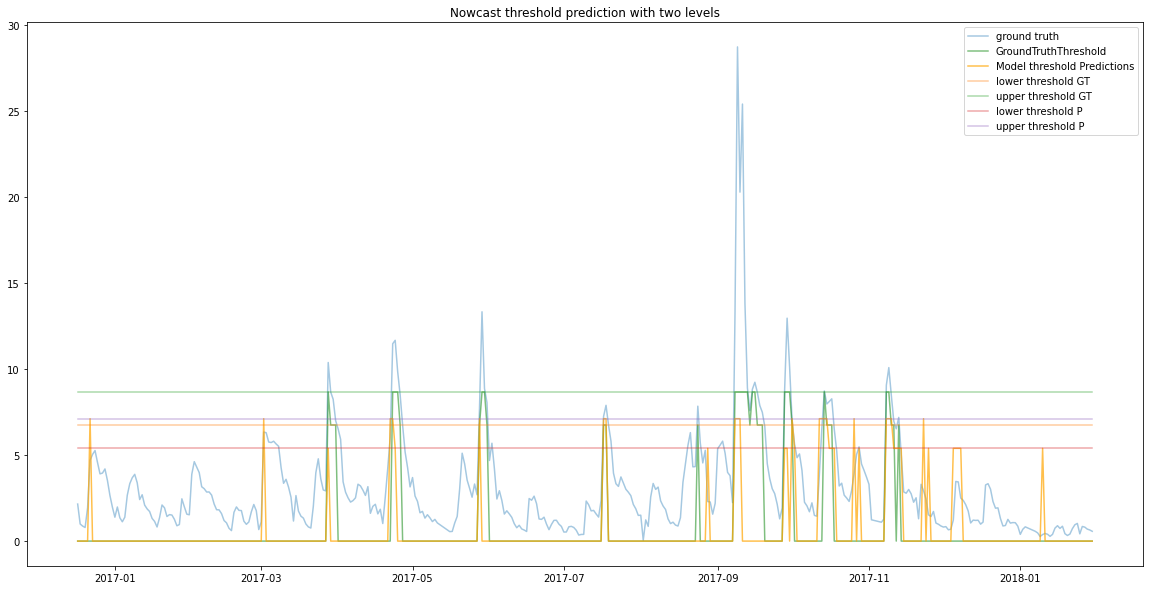

In [48]:
#new thresholds system

#input series
groundTruthSeries = testOutputVector
preditcedSeries = unbiasedPredict


#cutoff values.  Commonly used in our field but we haven't validated these values
lowerPercentileCutoff = 90
higherPercentileCutoff = 95

lowerThresholdGroundTruth = np.percentile(groundTruthSeries, lowerPercentileCutoff)
upperThresholdGroundTruth = np.percentile(groundTruthSeries, higherPercentileCutoff)

#prediction
lowerThresholdPrediction = np.percentile(preditcedSeries, lowerPercentileCutoff)
upperThresholdPrediction = np.percentile(preditcedSeries, higherPercentileCutoff)

print("Ground truth " + str(lowerPercentileCutoff) + "th percentile threshold: " + str(lowerThresholdGroundTruth))
print("Ground truth " + str(higherPercentileCutoff) + "percentile threshold: " + str(upperThresholdGroundTruth))

print("prediction " + str(lowerPercentileCutoff) + "th percentile threshold: " + str(lowerThresholdPrediction))
print("prediction " + str(higherPercentileCutoff) + "th percentile threshold: " + str(upperThresholdPrediction))


#for loop, check both data series

truePositive = 0
falsePositive = 0
trueNegative = 0
falseNegative = 0

positiveEvents = 0
negativeEvents = 0


modelPredicitons = []
groundTruthResults = []

randompredictions = []
alwaysFalsePredctions = []
alwyasTruePredictions = []
historyPredictions = []


#thresholds based on ML model
for i in range (0, len(groundTruthSeries)):
    predictedIsAboveHigherThreshold = bool(preditcedSeries[i] > upperThresholdPrediction)
    predictedIsAboveLowerThreshold = bool (preditcedSeries[i] > lowerThresholdPrediction)
    groundTruthIsAboveHigherThreshold = bool(groundTruthSeries[i] > upperThresholdGroundTruth)
    groundTruthIsAboveLowerThreshold = bool(groundTruthSeries[i] > lowerThresholdGroundTruth)

    #threshold for model
    if predictedIsAboveHigherThreshold:
        modelPredicitons.append(upperThresholdPrediction)
    elif predictedIsAboveLowerThreshold:
        modelPredicitons.append(lowerThresholdPrediction)
    else:
        modelPredicitons.append(0)

    #threshold for ground truth
    if groundTruthIsAboveHigherThreshold:
        groundTruthResults.append(upperThresholdGroundTruth)
    elif groundTruthIsAboveLowerThreshold:
        groundTruthResults.append(lowerThresholdGroundTruth)
    else:
        groundTruthResults.append(0)


"""
print("true positives: " + str(truePositive))
print("false positives: " + str(falsePositive))
print("true negatives: " + str(trueNegative))
print("false negatives: " + str(falseNegative))
print("*************")
print("sensitivity: " + str(truePositive / positiveEvents))
print("specificity: " + str(trueNegative/negativeEvents))

print("miss rate: " + str(falseNegative/positiveEvents))
"""


#forest output

f = plt.figure()
f.set_figwidth(20)
f.set_figheight(10)
plt.plot(newTestData.loc[:, "date"], testOutputVector, label = "ground truth", alpha = 0.4)


plt.plot(newTestData.loc[:, "date"], groundTruthResults, label = "GroundTruthThreshold", color = "green", alpha = 0.5)
plt.plot(newTestData.loc[:, "date"], modelPredicitons, label = "Model threshold Predictions", color = "orange", alpha = 0.7)
#plt.plot(newTestData.loc[:, "date"], randompredictions, label = "random Predictions")
#plt.plot(newTestData.loc[:, "date"], alwyasTruePredictions, label = "always true Predictions")
#plt.plot(newTestData.loc[:, "date"], alwaysFalsePredctions, label = "always false Predictions")
#plt.plot(newTestData.loc[:, "date"], historyPredictions, label = "hysteresis threshold Predictions", alpha = 0.4)


#plt.plot(newTestData.loc[:, "date"], unbiasedPredict, label = "regression prediction", alpha = 0.4)

plt.plot(newTestData.loc[:, "date"], np.full(len(modelPredicitons), lowerThresholdGroundTruth), label = "lower threshold GT", alpha = 0.4)
plt.plot(newTestData.loc[:, "date"], np.full(len(modelPredicitons), upperThresholdGroundTruth), label = "upper threshold GT", alpha = 0.4)

plt.plot(newTestData.loc[:, "date"], np.full(len(modelPredicitons), lowerThresholdPrediction), label = "lower threshold P", alpha = 0.4)
plt.plot(newTestData.loc[:, "date"], np.full(len(modelPredicitons), upperThresholdPrediction), label = "upper threshold P", alpha = 0.4)
plt.title("Nowcast threshold prediction with two levels")
plt.legend()
plt.show()


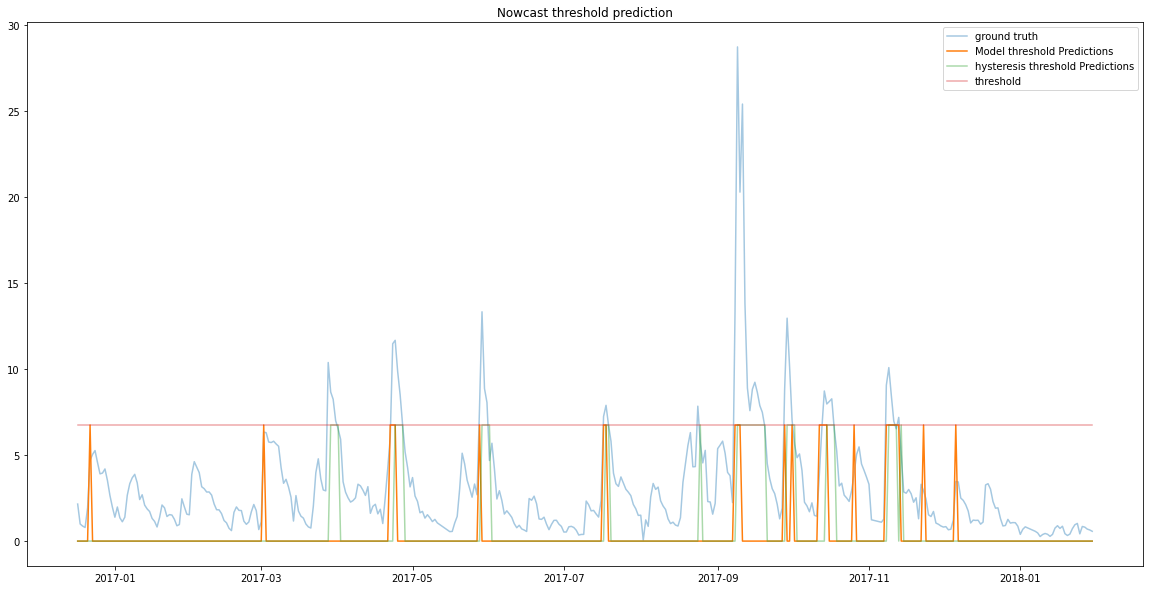

In [14]:
#forest output

f = plt.figure()
f.set_figwidth(20)
f.set_figheight(10)
plt.plot(newTestData.loc[:, "date"], testOutputVector, label = "ground truth", alpha = 0.4)
plt.plot(newTestData.loc[:, "date"], modelPredicitons, label = "Model threshold Predictions")
#plt.plot(newTestData.loc[:, "date"], randompredictions, label = "random Predictions")
#plt.plot(newTestData.loc[:, "date"], alwyasTruePredictions, label = "always true Predictions")
#plt.plot(newTestData.loc[:, "date"], alwaysFalsePredctions, label = "always false Predictions")
plt.plot(newTestData.loc[:, "date"], historyPredictions, label = "hysteresis threshold Predictions", alpha = 0.4)


#plt.plot(newTestData.loc[:, "date"], unbiasedPredict, label = "regression prediction", alpha = 0.7)

plt.plot(newTestData.loc[:, "date"], np.full(len(historyPredictions), groundTruthPercentile), label = "threshold", alpha = 0.4)
plt.title("Nowcast threshold prediction")
plt.legend()
plt.show()

Index(['date', 'dst_mean', 'dst_stdev', 'dst_variance', 'dst_slope',
       'dst_slope sign', 'dst_min', 'dst_max', 'dst_hour_0', 'dst_hour_1',
       ...
       'au_hour_22', 'au_hour_23', 'sensor number', 'total', 'inner', 'slot',
       'outer', 'datestamp', 'random', 'constant'],
      dtype='object', length=102)


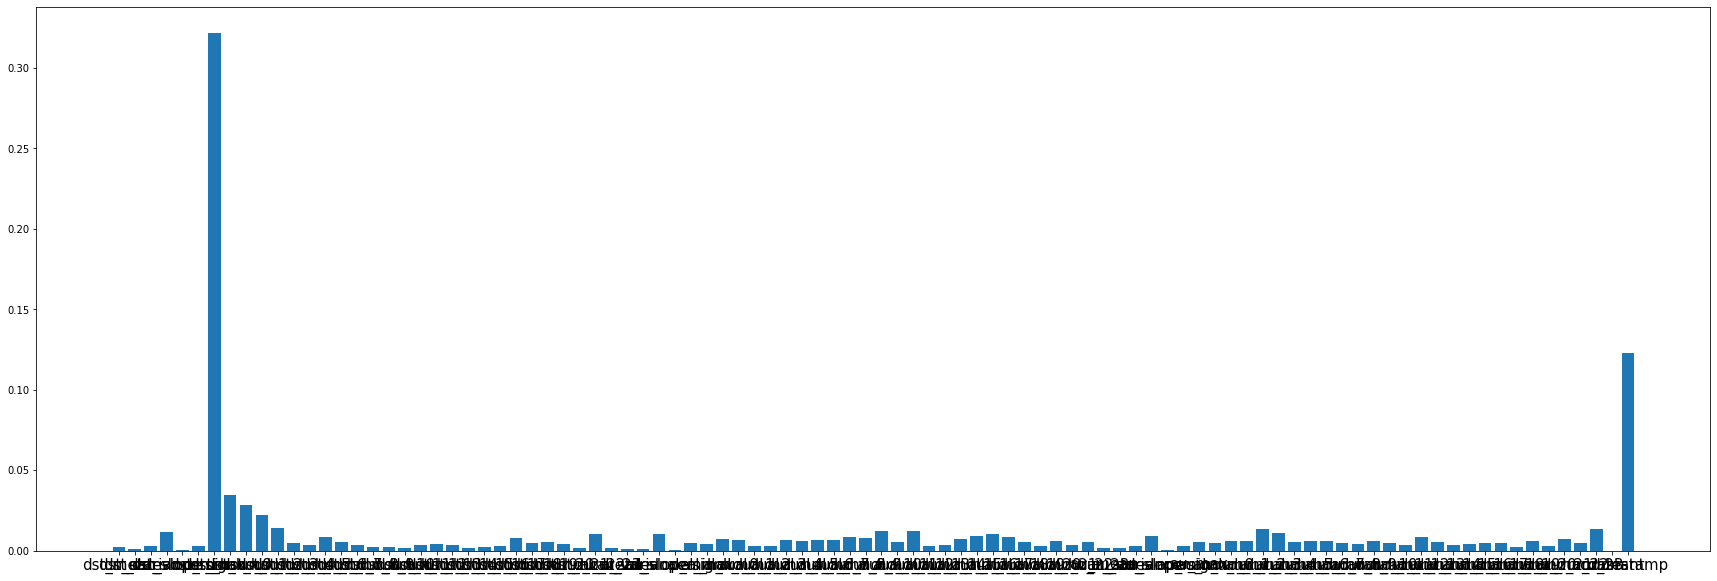

[2.19906982e-03 1.01423855e-03 2.96365053e-03 1.14564453e-02
 2.57216202e-04 2.64982174e-03 3.21878654e-01 3.43947623e-02
 2.81313264e-02 2.21825088e-02 1.38107350e-02 4.55019096e-03
 3.64760189e-03 8.26455783e-03 5.35564422e-03 3.49626026e-03
 2.30563005e-03 1.97358430e-03 1.52088269e-03 3.44587336e-03
 4.07210941e-03 3.61359808e-03 1.68338393e-03 2.11472074e-03
 3.03462658e-03 7.55984846e-03 4.78681438e-03 5.61314110e-03
 4.16423000e-03 1.88577828e-03 1.02500991e-02 1.46819995e-03
 1.11185713e-03 7.89978357e-04 1.06053785e-02 2.63193339e-04
 4.78186689e-03 4.33317656e-03 7.28490523e-03 6.71470152e-03
 3.00183300e-03 2.58055332e-03 6.71079128e-03 5.84890737e-03
 6.30152195e-03 6.89843895e-03 8.65350010e-03 7.86990090e-03
 1.20116862e-02 5.46502015e-03 1.18865240e-02 3.14048503e-03
 3.74192165e-03 7.37318201e-03 9.31845879e-03 1.04454633e-02
 8.39534687e-03 5.09879851e-03 2.63830800e-03 6.09160816e-03
 3.19765548e-03 5.62959206e-03 1.39414407e-03 1.31715270e-03
 3.09175746e-03 9.152807

In [15]:
#ifeature importances

importances = forestRegr.feature_importances_

#print(jointDF.columns)
f = plt.figure()
f.set_figwidth(30)
f.set_figheight(10)

labels = np.array(jointDF.columns[23])

#labels = np.append(["datetime"], dstColumnNames[1:])
lables = np.append(labels, ["random", "constant"])

print(jointDF.columns)


start = 0
end = len(importances)

importancesToPlot = importances[start:end]
keysToPlot = keysToStack[start:end]

plt.bar(range(len(importancesToPlot)), importancesToPlot, tick_label = keysToPlot)

plt.xticks(fontsize=15)


plt.show()
print(importances)




score is: 0.41409578071800046
cor coef = [[1.         0.66244935]
 [0.66244935 1.        ]]


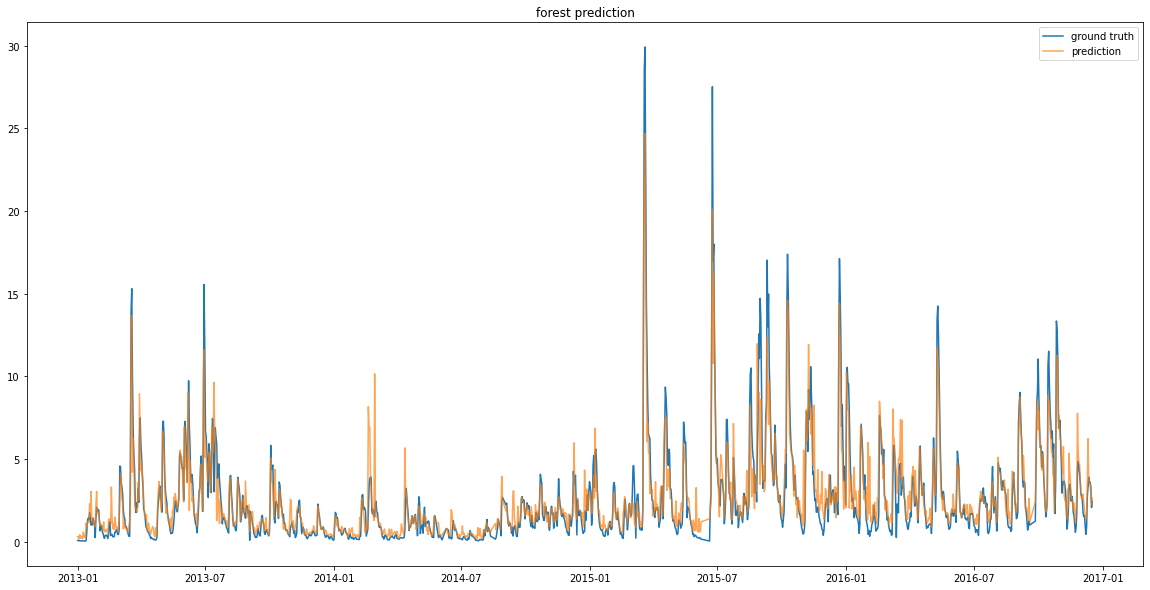

In [16]:
#forest output

print("score is: " + str(score))

print("cor coef = " + str(np.corrcoef(forrestTestDataPrediction, yTest)))

f = plt.figure()
f.set_figwidth(20)
f.set_figheight(10)
plt.plot(trainingData.loc[:, "date"], outputVector, label = "ground truth")
plt.plot(trainingData.loc[:, "date"], forestPrediction, label = "prediction", alpha = 0.7)
plt.title("forest prediction")
plt.legend()
plt.show()
#try explainable keras? model
#compare to hystersis
#-tommorrow is gonna be like today

#nithin clock/vector plot thing (dial plot)

In [17]:
#from sklearn.tree import plot_tree

#plt.figure(figsize=(100,100))
#plot_tree(forestRegr.estimators_[0], filled=True, impurity=True, rounded=True, fontsize=(40), label=keysToStack)

#plt.show()

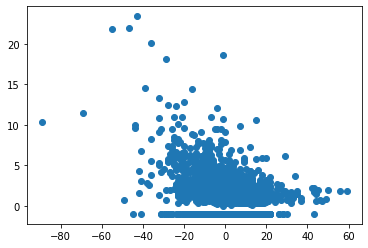

In [18]:
plt.scatter(jointDF.loc[:, "dst_max"], jointDF.loc[:, "total"])
plt.show()

In [19]:
#split the matched dataset into poes and input dataframes
#print(jointDF.columns[-8:-3])

#get all the poes keys
splitPoesKeys = [] 
for key in jointDF.columns[-8:-3]:
    splitPoesKeys.append(key)

splitPoesDf = pd.DataFrame()
for item in splitPoesKeys:
    splitPoesDf[item] = jointDF.loc[:, item]

#splitPoesDf = splitPoesDf["poes_original_date"] + jointDF.loc[:, "date"]

#print(splitPoesDf)


#make the input df key list

#get all the keys
inputDfKeys =[]
for key in jointDF.columns:
    inputDfKeys.append(key)

#remove the poes keys
for key in splitPoesKeys:
    inputDfKeys.remove(key)
#print(inputDfKeys)


#make input dataframe
inputDF = pd.DataFrame()
for key in inputDfKeys:
    inputDF[key] = jointDF.loc[:, key]

#rename date in input
inputDF = inputDF.rename(columns= {"date": "input original date"})
#print(inputDF)

In [20]:
#add new date shift

jointKey = "date_shift_key"
splitPoesDf[jointKey] = jointDF.loc[:, "date"]
inputDF[jointKey] =jointDF.loc[:, "date"]

#print(splitPoesDf)

shiftInDays = 1

#shift days and then recombine
#splitPoesDf[jointKey] = splitPoesDf[jointKey] + datetime.timedelta(days=shiftInDays)

for i, row in splitPoesDf.iterrows():
    splitPoesDf.at[i, jointKey] = splitPoesDf.loc[i, jointKey] + datetime.timedelta(days=shiftInDays)

#print(splitPoesDf)

newdf = inputDF.merge(splitPoesDf, on=jointKey)


#split so have test segment of data

dataPointToSplitAt = 1400

predictTrainingData = newdf.copy()[0:dataPointToSplitAt][:]

predictNewTestData = newdf.copy()[dataPointToSplitAt:][:]

print(predictNewTestData)

#print(splitPoesDf.size)
#print(newdf)

#make input vector

inputMatrix = []
predictTestMatrix = []

myKeys = keysToStack.copy()


myKeys.pop()
#myKeys.pop()
#myKeys.pop()
#print(myKeys)

for key in myKeys:
    inputMatrix.append(predictTrainingData.loc[:, key])
    predictTestMatrix.append(predictNewTestData.loc[:, key])
    

inputMatrix = np.stack(inputMatrix, -1)
predictTestMatrix = np.stack(predictTestMatrix, -1)
#scale the input matrix

scaledInputMatrix = inputMatrix.copy()

scaledPredictTestMatrix = predictTestMatrix.copy()

scaler = StandardScaler()
scaler.fit(scaledInputMatrix)
scaledInputMatrix = scaler.transform(scaledInputMatrix)

scaler.fit(scaledPredictTestMatrix)

scaledPredictTestMatrix = scaler.transform(scaledPredictTestMatrix)

#make output vector
outputVector = np.array(predictTrainingData.loc[:, "outer"])
predictTestOutputVector = np.array(predictNewTestData.loc[:, "outer"])

#make the model
xTrain, xTest, yTrain, yTest = train_test_split(scaledInputMatrix, outputVector, random_state=1)

#make the model
#scaledPoesRegr = MLPRegressor(random_state=1, hidden_layer_sizes=(100,), max_iter=5000).fit(xTrain, yTrain)

#get output prediciton
#myScaledPrediction = scaledPoesRegr.predict(scaledInputMatrix)

#score the regr
#score = scaledPoesRegr.score(xTest, yTest)
#poesRegr.score(xTrain, yTrain)

forestRegrPredict = RandomForestRegressor(max_depth=100, n_estimators=100, random_state=1, verbose=1)
forestRegrPredict.fit(xTrain, yTrain)

forestPrediction = forestRegrPredict.predict(scaledInputMatrix)

forrestTestDataPrediction = forestRegrPredict.predict(xTest)

score = forestRegrPredict.score(xTest, yTest)

     input original date   dst_mean  dst_stdev  dst_variance  dst_slope  \
1400          2017-01-02 -14.708333   6.450340     41.606884  -0.598250   
1401          2017-01-03 -11.333333   9.644402     93.014493  -0.527734   
1402          2017-01-04  -8.208333  11.189977    125.215580  -0.492195   
1403          2017-01-05 -12.000000   7.180893     51.565217  -0.075885   
1404          2017-01-06 -18.500000   4.763995     22.695652   1.024904   
...                  ...        ...        ...           ...        ...   
1777          2018-01-26  -6.250000   5.479210     30.021739   0.692252   
1778          2018-01-27  -7.625000   3.548576     12.592391  -0.063876   
1779          2018-01-28  -1.791667   2.948532      8.693841   0.922692   
1780          2018-01-29   1.291667   2.595635      6.737319   1.248723   
1781          2018-01-30   2.125000   5.160995     26.635870   0.830035   

      dst_slope sign  dst_min  dst_max  dst_hour_0  dst_hour_1  ...  \
1400            -1.0      -2

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    9.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


In [21]:
forecastUnbiasedPredict = forestRegrPredict.predict(scaledPredictTestMatrix)

forecastunbiasedScore = forestRegrPredict.score(scaledPredictTestMatrix, predictTestOutputVector)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


score is: 0.09001829641147607
cor coef = [[1.        0.3307402]
 [0.3307402 1.       ]]


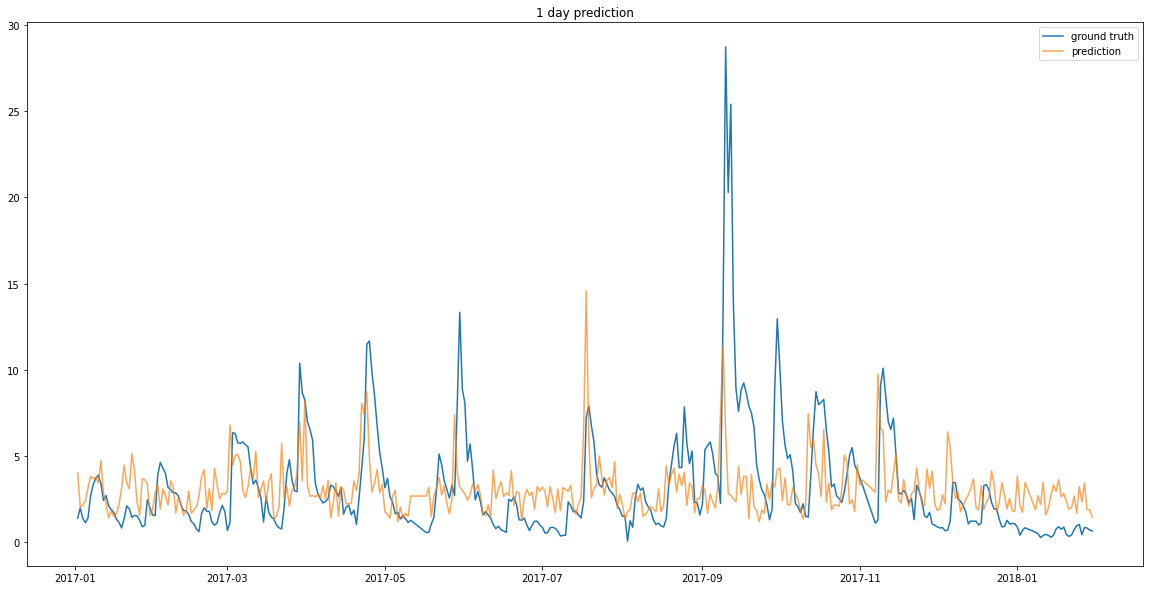

In [22]:
#forest output



print("score is: " + str(forecastunbiasedScore))

print("cor coef = " + str(np.corrcoef(forecastUnbiasedPredict, predictTestOutputVector)))

f = plt.figure()
f.set_figwidth(20)
f.set_figheight(10)
plt.plot(predictNewTestData.loc[:, "date_shift_key"], predictTestOutputVector, label = "ground truth")
plt.plot(predictNewTestData.loc[:, "date_shift_key"], forecastUnbiasedPredict, label = "prediction", alpha = 0.7)
plt.title(str(shiftInDays) + " day prediction")
plt.legend()
plt.show()

In [23]:
#inputs

import random

groundTruthSeries = predictTestOutputVector
predicedSeries = forecastUnbiasedPredict


percentileAmmount = 90

predictPercentile = np.percentile(predicedSeries, percentileAmmount)
groundTruthPercentile = np.percentile(groundTruthSeries, percentileAmmount)

print("predicted series percentile: " + str(predictPercentile))
print("ground truth percentile: " + str(groundTruthPercentile))


#walk through the data series
#check if both above the percentile
#based on yes no answers sort event into true/false and pos/negative
#   also store a counter of all the events

truePositive = 0
falsePositive = 0
trueNegative = 0
falseNegative = 0

positiveEvents = 0
negativeEvents = 0


modelPredicitons = []
randompredictions = []
alwaysFalsePredctions = []
alwyasTruePredictions = []
historyPredictions = []


#thresholds based on ML model
for i in range (0, len(groundTruthSeries)):
    predictedIsAbove = bool(predicedSeries[i] > groundTruthPercentile)
    modelPredicitons.append(groundTruthPercentile*int(predictedIsAbove))
    groundTruthIsAbove = bool(groundTruthSeries[i] > groundTruthPercentile)

    if(groundTruthIsAbove):
        positiveEvents +=1
    else:
        negativeEvents +=1

    if(predictedIsAbove and groundTruthIsAbove):
        truePositive += 1
    elif(not predictedIsAbove and groundTruthIsAbove):
        falseNegative +=1
    elif(predictedIsAbove and not groundTruthIsAbove):
        falsePositive+=1
    else:
        trueNegative+=1

print("true positives: " + str(truePositive))
print("false positives: " + str(falsePositive))
print("true negatives: " + str(trueNegative))
print("false negatives: " + str(falseNegative))
print("*************")
print("sensitivity: " + str(truePositive / positiveEvents))
print("specificity: " + str(trueNegative/negativeEvents))

print("miss rate: " + str(falseNegative/positiveEvents))

truePositive = 0
falsePositive = 0
trueNegative = 0
falseNegative = 0

positiveEvents = 0
negativeEvents = 0

#random
print("*****************************************")
print("stats for random model:")

for i in range (0, len(groundTruthSeries)):
    predictedIsAbove = bool(random.randint(0,1))
    randompredictions.append(groundTruthPercentile*int(predictedIsAbove))
    groundTruthIsAbove = bool(groundTruthSeries[i] > groundTruthPercentile)

    if(groundTruthIsAbove):
        positiveEvents +=1
    else:
        negativeEvents +=1

    if(predictedIsAbove and groundTruthIsAbove):
        truePositive += 1
    elif(not predictedIsAbove and groundTruthIsAbove):
        falseNegative +=1
    elif(predictedIsAbove and not groundTruthIsAbove):
        falsePositive+=1
    else:
        trueNegative+=1


print("true positives: " + str(truePositive))
print("false positives: " + str(falsePositive))
print("true negatives: " + str(trueNegative))
print("false negatives: " + str(falseNegative))
print("*************")
print("sensitivity: " + str(truePositive / positiveEvents))
print("specificity: " + str(trueNegative/negativeEvents))

print("miss rate: " + str(falseNegative/positiveEvents))


truePositive = 0
falsePositive = 0
trueNegative = 0
falseNegative = 0

positiveEvents = 0
negativeEvents = 0


#always select not true
print("*****************************************")
print("stats for never true model:")

for i in range (0, len(groundTruthSeries)):
    predictedIsAbove = bool(groundTruthPercentile*0)
    alwaysFalsePredctions.append(0)
    groundTruthIsAbove = bool(groundTruthSeries[i] > groundTruthPercentile)

    if(groundTruthIsAbove):
        positiveEvents +=1
    else:
        negativeEvents +=1

    if(predictedIsAbove and groundTruthIsAbove):
        truePositive += 1
    elif(not predictedIsAbove and groundTruthIsAbove):
        falseNegative +=1
    elif(predictedIsAbove and not groundTruthIsAbove):
        falsePositive+=1
    else:
        trueNegative+=1

print("true positives: " + str(truePositive))
print("false positives: " + str(falsePositive))
print("true negatives: " + str(trueNegative))
print("false negatives: " + str(falseNegative))
print("*************")
print("sensitivity: " + str(truePositive / positiveEvents))
print("specificity: " + str(trueNegative/negativeEvents))

print("miss rate: " + str(falseNegative/positiveEvents))


truePositive = 0
falsePositive = 0
trueNegative = 0
falseNegative = 0

positiveEvents = 0
negativeEvents = 0


#always select true
print("*****************************************")
print("stats for always true model:")

for i in range (0, len(groundTruthSeries)):
    predictedIsAbove = groundTruthPercentile * 1
    alwyasTruePredictions.append(1)
    groundTruthIsAbove = bool(groundTruthSeries[i] > groundTruthPercentile)

    if(groundTruthIsAbove):
        positiveEvents +=1
    else:
        negativeEvents +=1

    if(predictedIsAbove and groundTruthIsAbove):
        truePositive += 1
    elif(not predictedIsAbove and groundTruthIsAbove):
        falseNegative +=1
    elif(predictedIsAbove and not groundTruthIsAbove):
        falsePositive+=1
    else:
        trueNegative+=1


print("true positives: " + str(truePositive))
print("false positives: " + str(falsePositive))
print("true negatives: " + str(trueNegative))
print("false negatives: " + str(falseNegative))
print("*************")
print("sensitivity: " + str(truePositive / positiveEvents))
print("specificity: " + str(trueNegative/negativeEvents))

print("miss rate: " + str(falseNegative/positiveEvents))


truePositive = 0
falsePositive = 0
trueNegative = 0
falseNegative = 0

positiveEvents = 0
negativeEvents = 0

#hysterisis
print("*****************************************")
print("stats for history model:")

PrevGroundTruthIsAbove = bool(0)

for i in range (0, len(groundTruthSeries)):
    #predictedIsAbove = bool(predicedSeries[i] > groundTruthPercentile)
    groundTruthIsAbove = bool(groundTruthSeries[i] > groundTruthPercentile)
    historyPredictions.append(groundTruthPercentile* int(PrevGroundTruthIsAbove))

    if(groundTruthIsAbove):
        positiveEvents +=1
    else:
        negativeEvents +=1

    if(PrevGroundTruthIsAbove and groundTruthIsAbove):
        truePositive += 1
    elif(not PrevGroundTruthIsAbove and groundTruthIsAbove):
        falseNegative +=1
    elif(PrevGroundTruthIsAbove and not groundTruthIsAbove):
        falsePositive+=1
    else:
        trueNegative+=1

    PrevGroundTruthIsAbove = groundTruthIsAbove


print("true positives: " + str(truePositive))
print("false positives: " + str(falsePositive))
print("true negatives: " + str(trueNegative))
print("false negatives: " + str(falseNegative))
print("*************")
print("sensitivity: " + str(truePositive / positiveEvents))
print("specificity: " + str(trueNegative/negativeEvents))

print("miss rate: " + str(falseNegative/positiveEvents))

print("number of data points is: " + str(len(groundTruthSeries)) + " number of registered points is: " + str(trueNegative + truePositive + falseNegative+ falsePositive))


predicted series percentile: 4.445528499999999
ground truth percentile: 6.99516
true positives: 4
false positives: 6
true negatives: 337
false negatives: 35
*************
sensitivity: 0.10256410256410256
specificity: 0.9825072886297376
miss rate: 0.8974358974358975
*****************************************
stats for random model:
true positives: 17
false positives: 162
true negatives: 181
false negatives: 22
*************
sensitivity: 0.4358974358974359
specificity: 0.5276967930029155
miss rate: 0.5641025641025641
*****************************************
stats for never true model:
true positives: 0
false positives: 0
true negatives: 343
false negatives: 39
*************
sensitivity: 0.0
specificity: 1.0
miss rate: 1.0
*****************************************
stats for always true model:
true positives: 39
false positives: 343
true negatives: 0
false negatives: 0
*************
sensitivity: 1.0
specificity: 0.0
miss rate: 0.0
*****************************************
stats for history

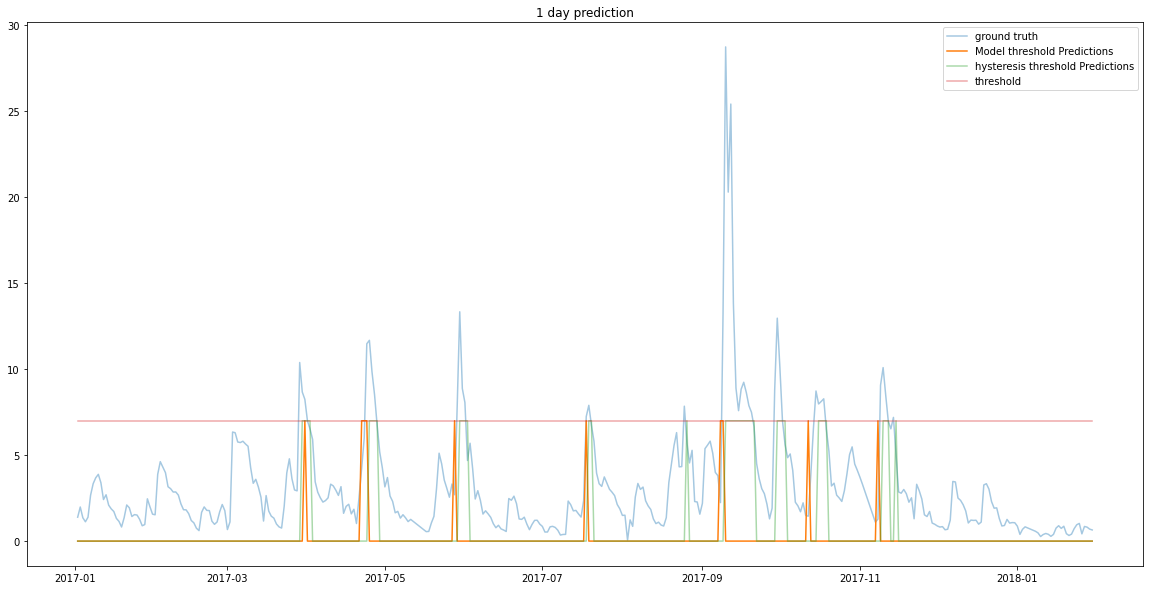

In [24]:
#forest output

f = plt.figure()
f.set_figwidth(20)
f.set_figheight(10)
#plt.plot(newTestData.loc[:, "date"], testOutputVector, label = "ground truth", alpha = 0.4)

plt.plot(predictNewTestData.loc[:, "date_shift_key"], predictTestOutputVector, label = "ground truth", alpha = 0.4)
#plt.plot(predictNewTestData.loc[:, "date_shift_key"], forecastUnbiasedPredict, label = "prediction", alpha = 0.7)
plt.plot(predictNewTestData.loc[:, "date_shift_key"], modelPredicitons, label = "Model threshold Predictions")
#plt.plot(newTestData.loc[:, "date"], randompredictions, label = "random Predictions")
#plt.plot(newTestData.loc[:, "date"], alwyasTruePredictions, label = "always true Predictions")
#plt.plot(newTestData.loc[:, "date"], alwaysFalsePredctions, label = "always false Predictions")
plt.plot(predictNewTestData.loc[:, "date_shift_key"], historyPredictions, label = "hysteresis threshold Predictions", alpha = 0.4)

plt.plot(predictNewTestData.loc[:, "date_shift_key"], np.full(len(historyPredictions), groundTruthPercentile), label = "threshold", alpha = 0.4)


#plt.plot(newTestData.loc[:, "date"], unbiasedPredict, label = "regression prediction", alpha = 0.7)
plt.title(str(shiftInDays) + " day prediction")
plt.legend()
plt.show()

Index(['date', 'dst_mean', 'dst_stdev', 'dst_variance', 'dst_slope',
       'dst_slope sign', 'dst_min', 'dst_max', 'dst_hour_0', 'dst_hour_1',
       ...
       'au_hour_22', 'au_hour_23', 'sensor number', 'total', 'inner', 'slot',
       'outer', 'datestamp', 'random', 'constant'],
      dtype='object', length=102)


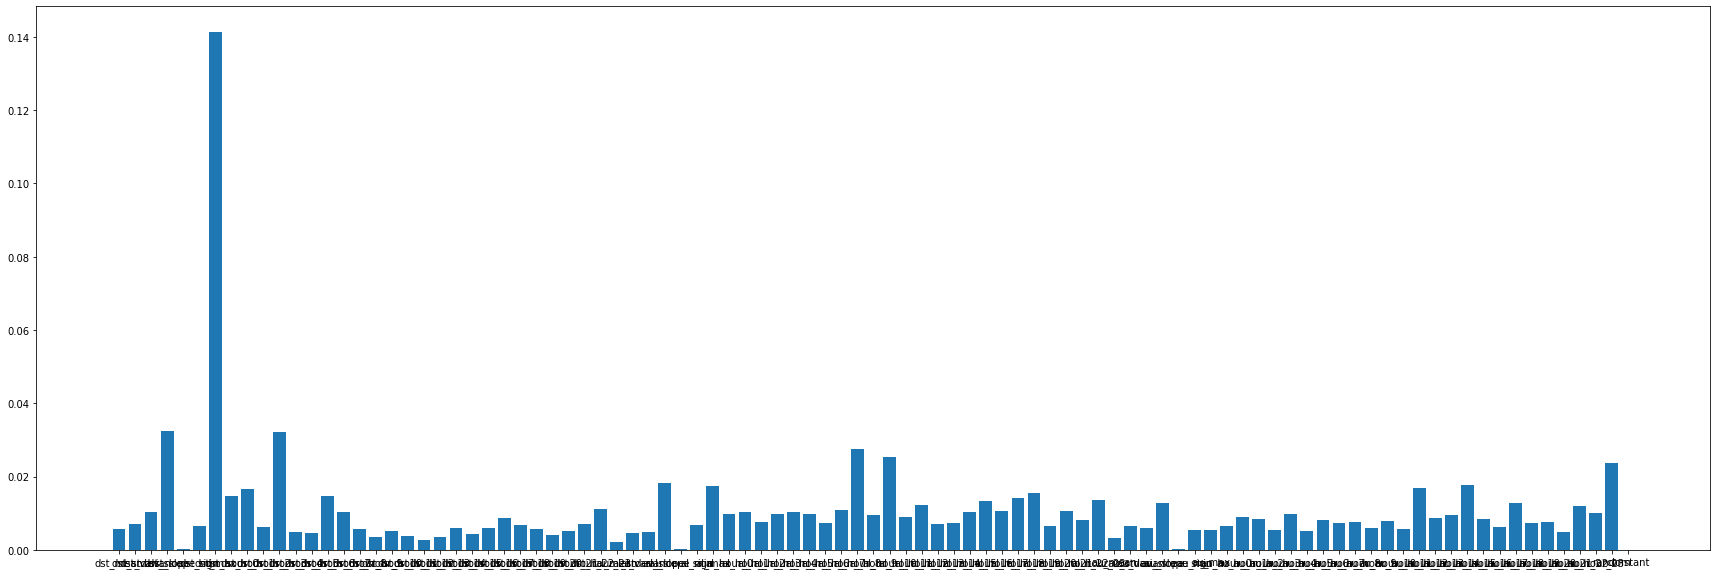

[0.00561099 0.00699018 0.01043073 0.0325559  0.0001986  0.00653101
 0.14121178 0.01478476 0.01665512 0.00630725 0.03215751 0.00499382
 0.00452363 0.01456502 0.01024349 0.00578051 0.00356676 0.00511512
 0.00372859 0.00268782 0.00345793 0.00599327 0.00433563 0.00589572
 0.00863691 0.00677908 0.00575288 0.00404941 0.00509877 0.00712865
 0.0110374  0.00213549 0.00450203 0.00492409 0.0183574  0.0002254
 0.00667484 0.0173086  0.00977556 0.01047183 0.00764867 0.00970981
 0.01030284 0.00982719 0.00722922 0.01089983 0.0274677  0.00965312
 0.02536209 0.00893291 0.01225942 0.00719518 0.007263   0.01041016
 0.01330303 0.01049041 0.01413321 0.01541381 0.00644355 0.01053818
 0.00815599 0.01370331 0.00332707 0.00640932 0.00585897 0.01285557
 0.00018432 0.00553738 0.00541945 0.00657833 0.00899192 0.0084924
 0.00537997 0.00976306 0.00515745 0.008043   0.00735629 0.0076631
 0.00584156 0.00787622 0.00562021 0.01694831 0.00859924 0.00946096
 0.01756586 0.00840874 0.00625199 0.01288399 0.00744193 0.0076984

In [25]:
importances = forestRegrPredict.feature_importances_

#print(jointDF.columns)
f = plt.figure()
f.set_figwidth(30)
f.set_figheight(10)

labels = np.array(jointDF.columns[23])

#labels = np.append(["datetime"], dstColumnNames[1:])
lables = np.append(labels, ["random", "constant"])

print(jointDF.columns)


start = 0
end =  len(importances) 

importancesToPlot = importances[start:end]
keysToPlot = keysToStack[start:end]

plt.bar(range(len(importancesToPlot)), importancesToPlot, tick_label = keysToPlot)

plt.show()
print(importances)


score is: 0.17688016463472334
cor coef = [[1.         0.42941301]
 [0.42941301 1.        ]]


ValueError: x and y must have same first dimension, but have shapes (1782,) and (1400,)

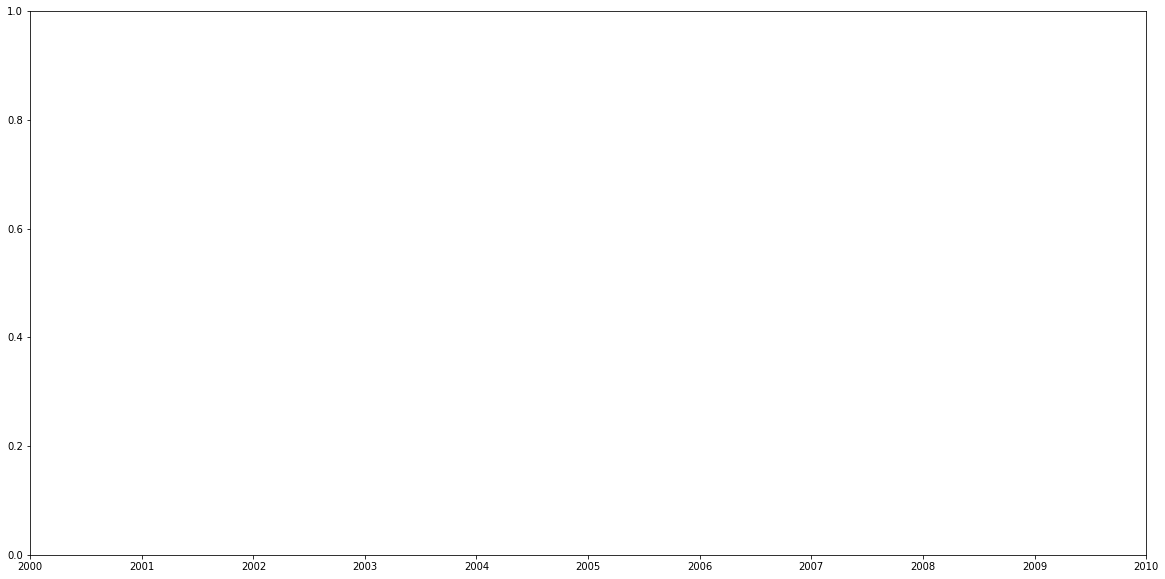

In [26]:
"""

#note: this is vestigial code atm
print("score is: " + str(score))

print("cor coef = " + str(np.corrcoef(forrestTestDataPrediction, yTest)))

f = plt.figure()
f.set_figwidth(20)
f.set_figheight(10)
plt.plot(newdf.loc[:, "input original date"], outputVector, label = "ground truth")
plt.plot(newdf.loc[:, "input original date"], forestPrediction, label = "prediction", alpha = 0.7)
plt.title("forest prediction")
plt.legend()
plt.show()
"""